O jogo da forca é um entretenimento infantil comum, que consiste na escolha de uma palavra secreta. Os jogadores sabem a quantidade de letras na palavra, escolhem letras do alfabeto e onde há a respectiva letra, é marcado, para ir montando a palavra aos poucos. Caso a letra não esteja presente na palavra, o jogador perde uma vida. Ganha o jogo caso o jogador consiga descobrir a palavra completa sem perder todas as vidas. 

Nesse projeto, foi criado um pequeno código para gerar um jogo da forca com as palavras presentes no dicionário sem acentos do ime (disponível em https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt), com 5 vidas, presente no arquivo “jogoDeForca.py”. 

Além disso, era necessário desenvolver um agente para jogar o jogo da forca. Para tanto, foi escolhida uma estratégia para a seleção da letra (abordada a seguir). Após cada jogada é realizada a filtragem das palavras possíveis. Se a letra não estiver presente, todas as palavras com aquela letra são retiradas. Caso contrário, são selecionadas todas as palavras que tenham as letras nas posições descobertas. Ele realiza chute de letras até completar a palavra ou perder as 5 vidas. 

Foram pensadas duas abordagens para o problema de selecionar a letra, a primeira realiza o cálculo da quantidade de palavras que contenham a letra analisada e decide selecionar a letra que aparece em mais palavras. A segunda abordagem realiza o cálculo da frequência da letra em todas as palavras e seleciona a letra mais frequente. Desse modo, a primeira tenta minimizar a perda de vida, ao longo das iterações (caso a letra selecionada esteja presente na palavra secreta, o jogador não irá perder vida), possibilitando que ele vença, ainda que precise de várias tentativas. A segunda abordagem também leva em conta que, uma letra mais frequente, caso presente na palavra secreta, pode ter uma distribuição específica, de modo que a letra apareça mais de uma vez na palavra, em posições que serão conhecidas e portanto, pode-se reduzir bem mais o conjunto.

As duas implementações foram criadas e testadas. Para nossa surpresa, o resultado da abordagem de frequência apresentou uma performance bem melhor que o de minimização de perda de vida. Desse modo, para o projeto, será utilizado a abordagem da frequência (a outra abordagem está presente no arquivo demo2.ipynb). 


Abaixo pode ser visualizado o passo a passo:


Primeiro é realizado o import da classe JogoDaForca, seguindo as especificações descritas


In [2]:
from jogoDeForca import JogoDeForca

Nesse ponto é descrita a idéia principal do algoritmo. A função "calcular_frequencia_letras” conta a quantidade de aparições de cada uma das letras presentes na lista de palavras possíveis e retorna um dicionário com uma chave representando cada letra e o valor a quantidade de aparições da letra. Por outro lado, a função “escolher_letra” seleciona a letra com valor máximo.


In [3]:
def calcular_frequencia_letras(palavras, letras_tentadas):
    frequencia = {}
    for palavra in palavras:
        for letra in palavra:
            if letra not in letras_tentadas:
                if letra in frequencia:
                    frequencia[letra] += 1
                else:
                    frequencia[letra] = 1
    return frequencia

def escolher_letra(frequencia):
    letra_mais_frequente = max(frequencia, key=frequencia.get)
    return letra_mais_frequente


Com isso, pode-se criar o agente para realizar os jogos, apresentado abaixo como a função “jogar”. O processo consiste na inicialização de variáveis para um novo jogo, que ocorre antes do while. Em seguida é realizada a escolha da letra, recuperado os índices em que ela está presente e é realizado o filtro no conjunto de palavras possíveis. Esse processo é repetido até que a palavra parcial esteja com todas as letras ou até o jogador perder todas as vidas. A função “palavra_compatible” é utilizada para filtrar todas as palavras que não são mais válidas, após descobrir os índices da última tentativa. 

In [4]:
## Função que verifica se uma palavra é compatível com a palavra parcial e a tentativa
def palavra_compatible(palavra, palavra_parcial, tentativa):
    if len(palavra) != len(palavra_parcial): ## se o tamanho da palavra for diferente do tamanho da palavra parcial,
                                             ## deve ser descartada
        return False

    for idx, letra in enumerate(palavra_parcial): 
        ## verifica se a palavra não tem a letra tentada numa posição onde ela aparece na palavra parcial
        if letra == "_" and palavra[idx] == tentativa: 
            return False
        
        ## verifica se a palavra tem uma letra diferente da letra tentada numa posição onde ela aparece na palavra parcial
        if letra != "_" and palavra[idx] != letra:
            return False
    return True


def jogar(jogo):
    tamanho_palavra = jogo.novo_jogo() ## Inicia um novo jogo
    palavra_parcial = ["_" for _ in range(tamanho_palavra)] ## Inicia a palavra parcial com "_" para cada letra
    vidas = jogo.vidas ## recupera o número de vidas
    palavras_possiveis = jogo.content.copy() ## recupera a lista de palavras possíveis, 
                                            ## que é igual a lista de palavras do dicionario do ime-usp
    letras_tentadas = set() ## inicia o conjunto de letras tentadas

    while "_" in palavra_parcial and vidas > 0:  ## enquanto a palavra parcial tiver "_" e vidas > 0
        frequencia = calcular_frequencia_letras(palavras_possiveis, letras_tentadas) ## calcula a frequencia das letras
        tentativa = escolher_letra(frequencia) ## escolhe a letra mais frequente
        letras_tentadas.add(tentativa) ## adiciona a letra escolhida ao conjunto de letras tentadas

        indices = jogo.tentar_letra(tentativa) ## tenta a letra escolhida e recupera os indices onde ela aparece
        if indices: ## se a letra estiver na palavra
            for idx in indices: ## atualiza a palavra parcial
                palavra_parcial[idx] = tentativa
            ## atualiza a lista de palavras possíveis
            palavras_possiveis = [palavra for palavra in palavras_possiveis if palavra_compatible(palavra, palavra_parcial, tentativa)]
        else:
            ## atualiza a lista de palavras possíveis
            palavras_possiveis = [palavra for palavra in palavras_possiveis if tentativa not in palavra]

        ## atualiza o número de vidas
        vidas = jogo.vidas

    return vidas


Por fim, o código abaixo realiza a simulação de vários jogos, com o cálculo da acurácia. Também é realizado um plot com a quantidade de vidas restantes que o agente finaliza ao descobrir a palavra. Perceba que, para a maioria dos jogos, ele venceu com poucas perdas de vida. 

Total de jogos: 1000
Jogos ganhos: 970
Jogos perdidos: 30
Acurácia: 97.00%


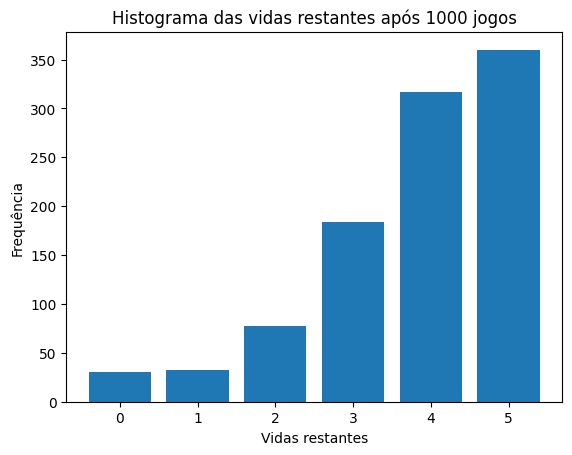

In [7]:
import matplotlib.pyplot as plt
resultados = []
n_jogos = 1000
jogo = JogoDeForca()

for _ in range(n_jogos):
    vidas_restantes = jogar(jogo)
    resultados.append(vidas_restantes)

qtd_jogos_ganhos = sum([1 for vidas in resultados if vidas > 0])
print(f"Total de jogos: {n_jogos}")
print(f"Jogos ganhos: {qtd_jogos_ganhos}")
print(f"Jogos perdidos: {sum([1 for vidas in resultados if vidas == 0])}")
print(f"Acurácia: {qtd_jogos_ganhos/n_jogos * 100:.2f}%")

plt.hist(resultados, bins=range(0, 7), align='left', rwidth=0.8)
plt.xlabel('Vidas restantes')
plt.ylabel('Frequência')
plt.title('Histograma das vidas restantes após 1000 jogos')
plt.xticks(range(0, 6))
plt.show()


Para realizar a análise de erro, foi criado um arquivo à parte para inicializar o jogo da forca com uma letra escolhida. A letra escolhida para a análise foi “nevas”, pois é uma palavra para a qual o algoritmo perde. Em seguida foi utilizada a ferramenta de depuração para analisar como o algoritmo se comportou e a razão da falha, que será explicitada nesse texto.   

Para a primeira iteração, como é de se esperar, a letra “a” é a mais frequente, com 4274, seguido de “o” com 2790. Após realizar a filtragem para “a” no índice 3, restam 821 palavras. Realizando o cálculo de frequência de letras, o “s” é a letra com mais ocorrências (414). A seguir, é realizada a escolha do “s” presente no índice 4 e a filtragem das palavras, que agora contam 263. A próxima letra escolhida é o “o”, com 84 ocorrências. Nesse caso, o agente perde uma vida e as palavras com o são filtradas, restando 179. Em seguida é tentado o “i” com 70 ocorrências, novamente o agente perde uma vida e filtra as palavras, que agora contam 110. Agora ele tenta “e” com 61 ocorrências, acertando a letra do índice 1. Após a filtragem restam 57 palavras. Nesse ponto, um evento que merece destaque ocorre. As letras restantes, “n” e “v” contabilizam 7 e 9, respectivamente. Porém as letras “r”, “l”, “c” e “t” são mais frequentes, como restam somente 3 vidas e só há duas posições (diminuindo a sobreposição consideravelmente), o agente apresenta pouca chance de vitória. De fato, ele realiza a escolha do “r”, deixando 40 palavras. Em seguida a escolha do “l”, deixando 27 palavras. Por fim, realiza a escolha do “c”, deixando 19 palavras possíveis.     
	
A partir dessa análise alguns pontos merecem destaque. Primeiramente, a quantidade de letras pode ter uma grande influência, tanto pela quantidade de palavras com mais letras ser inferior às de 5, 6 letras, quanto por apresentar menos letras selecionáveis para realizar a filtragem para um bom subgrupo. Outro ponto relevante, é a escolha das letras, já que o agente sempre irá escolher a mais frequente, escolher palavras pouco frequentes, permite que haja uma série de erros, e garantindo a derrota do agente. Na simulação realizada, palavras com “x”, “p”, “j”, “f”, entre outras, apresentavam um índice baixo, de modo que a escolha de qualquer uma das 19 palavras restantes gera a derrota do agente. Sendo assim, analisar a frequência das letras e montar uma palavra que apresente o máximo de letras pouco frequentes pode ser uma boa estratégia para derrotar o agente (no caso da simulação, “n” e “v”). 


In [9]:
from jogoDeForcaAnalise import JogoDeForcaParaAnaliseDeErro

jogoAnalise = JogoDeForcaParaAnaliseDeErro()
vidas = jogar(jogoAnalise)
print(vidas)